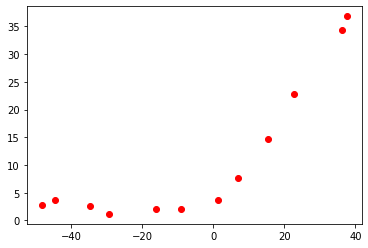

In [479]:
import numpy as np
from scipy.io import loadmat
from scipy.optimize import minimize
import matplotlib.pyplot as plt

data = loadmat('ex5data1.mat')
X = data['X']
X_bias = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
y = data['y']
Xval = data['Xval']
Xval_bias = np.concatenate((np.ones((Xval.shape[0], 1)), Xval), axis=1)
yval = data['yval']
Xtest = data['Xtest']
Xtest_bias = np.concatenate((np.ones((Xtest.shape[0], 1)), Xtest), axis=1)
ytest = data['ytest']

plt.plot(X, y, 'ro')
plt.show()

In [480]:
def costFunction(theta, X, y, reg):
    batch_size = X.shape[0]
    y_pred = np.matmul(X, theta.reshape(theta.size, 1))
    unreg_cost = (np.sum((y - y_pred)**2))/(2*batch_size)
    reg_cost = (reg/2*batch_size)*np.sum((theta[1:])**2)
    return unreg_cost + reg_cost

In [481]:
def gradient(theta, X, y, reg):
    batch_size = X.shape[0]
    y_pred = np.matmul(X, theta.reshape(theta.size, 1))
    grad = ((np.matmul((y_pred - y).transpose(), X) + reg*theta.transpose())/batch_size).flatten()
    grad[0] = grad[0] - (reg*theta[0])/batch_size
    return grad

In [482]:
theta = np.array([1, 1])
print(costFunction(theta, X_bias, y, 0))
print(gradient(theta, X_bias, y, 0))

303.9515255535976
[-15.30301567 598.16741084]


In [483]:
def train(X, y, reg):
    batch_size = X.shape[0]
    theta = np.random.rand(X.shape[1]).flatten()
    res = minimize(costFunction, theta, args=(X, y, reg), method=None, jac=gradient,
                   options={'maxiter':5000})
    
    return res

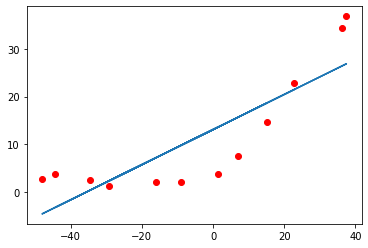

In [484]:
tr = train(X_bias, y, 0)
thetaArr = tr.x
plt.plot(X, y, 'ro')
plt.plot(X, np.matmul(X_bias, thetaArr.reshape(thetaArr.size, 1)))
plt.show()

In [485]:
# Learning curve
def learningCurve(X, y, Xval, yval, batch_size, reg):
    graphParams = np.zeros((batch_size, 3))
    for i in range(0, batch_size):
        tr = train(X[0:i+1,:], y[0:i+1,:], reg)
        thetaArr = tr.x
        graphParams[i,0] = i+1
        graphParams[i,1] = costFunction(thetaArr, X[0:i+1,:], y[0:i+1,:], reg)
        graphParams[i,2] = costFunction(thetaArr, Xval, yval, reg)

    plt.plot(graphParams[:,0], graphParams[:,1])
    plt.plot(graphParams[:,0], graphParams[:,2])
    plt.show()

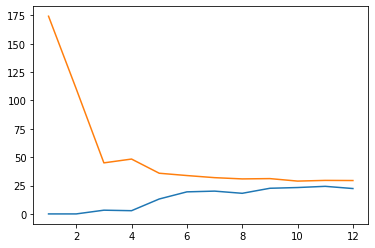

In [486]:
learningCurve(X_bias, y, Xval_bias, yval, X_bias.shape[0], 0)

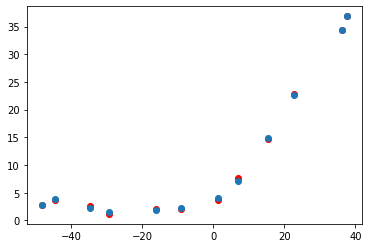

In [489]:
X_bias_new = X_bias
Xval_bias_new = Xval_bias
Xtest_bias_new = Xtest_bias
for i in range(2, 9):
    X_bias_new = np.concatenate((X_bias_new, X_bias_new[:,1:2]**i), axis=1)
    
    Xval_bias_new = np.concatenate((Xval_bias_new, Xval_bias_new[:,1:2]**i), axis=1)
    Xtest_bias_new = np.concatenate((Xtest_bias_new, Xtest_bias_new[:,1:2]**i), axis=1)

tr = train(X_bias_new, y, 0)
thetaArr = tr.x
plt.plot(X, y, 'ro')
plt.plot(X, np.matmul(X_bias_new, thetaArr.reshape(thetaArr.size, 1)), 'o')
plt.show()

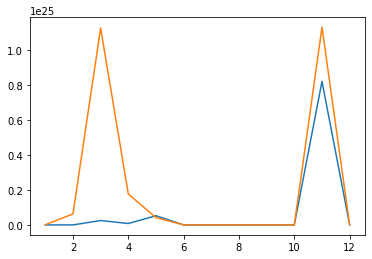

In [492]:
learningCurve(X_bias_new, y, Xval_bias_new, yval, X_bias_new.shape[0], 0)

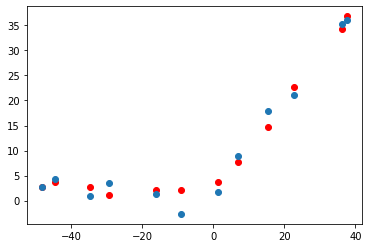

In [493]:
tr = train(X_bias_new, y, 1)
thetaArr = tr.x
plt.plot(X, y, 'ro')
plt.plot(X, np.matmul(X_bias_new, thetaArr.reshape(thetaArr.size, 1)), 'o')
plt.show()

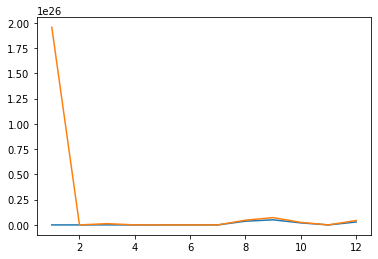

In [494]:
learningCurve(X_bias_new, y, Xval_bias_new, yval, X_bias_new.shape[0], 1)

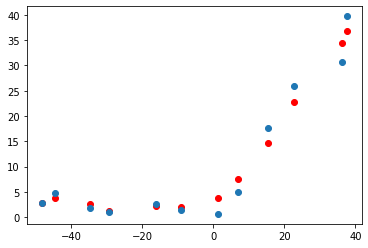

In [499]:
tr = train(X_bias_new, y, 100)
thetaArr = tr.x
plt.plot(X, y, 'ro')
plt.plot(X, np.matmul(X_bias_new, thetaArr.reshape(thetaArr.size, 1)), 'o')
plt.show()

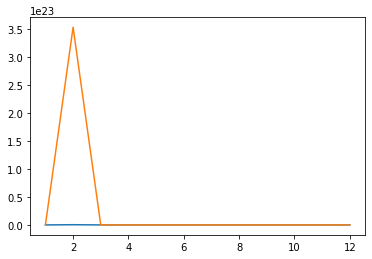

In [500]:
learningCurve(X_bias_new, y, Xval_bias_new, yval, X_bias_new.shape[0], 100)

In [501]:
def decideRegCurve(X, y, Xval, yval, Xtest, ytest):
    graphParams = np.zeros((9, 3))
    reg = 0.001
    i = 0
    while reg<10:
        tr = train(X, y, reg)
        thetaArr = tr.x
        graphParams[i,0] = reg
        graphParams[i,1] = costFunction(thetaArr, Xtest, ytest, reg)
        graphParams[i,2] = costFunction(thetaArr, Xval, yval, reg)
        i = i+1
        reg = reg*3

    plt.plot(graphParams[:,0], graphParams[:,1])
    plt.plot(graphParams[:,0], graphParams[:,2])
    plt.show()

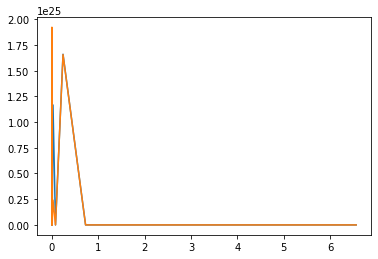

In [507]:
decideRegCurve(X_bias_new, y, Xval_bias_new, yval, Xtest_bias_new, ytest)

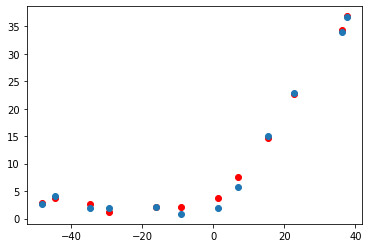

In [510]:
tr = train(X_bias_new, y, 3)
thetaArr = tr.x
plt.plot(X, y, 'ro')
plt.plot(X, np.matmul(X_bias_new, thetaArr.reshape(thetaArr.size, 1)), 'o')
plt.show()